In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits= load_digits()

In [5]:
df = pd.DataFrame(digits.data,digits.target)

In [6]:
df['target'] = digits.target 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn =  KNeighborsClassifier()

In [28]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
model_params = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1,5,15,10,20],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size' : [10,20,30,40]
        }  
    }
}

In [31]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,knn,0.964393,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."


In [34]:
knn = KNeighborsClassifier(algorithm ='auto',leaf_size=10,n_neighbors = 10)

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=10)

In [36]:
knn.score(X_test,y_test)

0.9822222222222222

In [38]:
y_predicted= knn.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)


Text(69.0, 0.5, 'Truth')

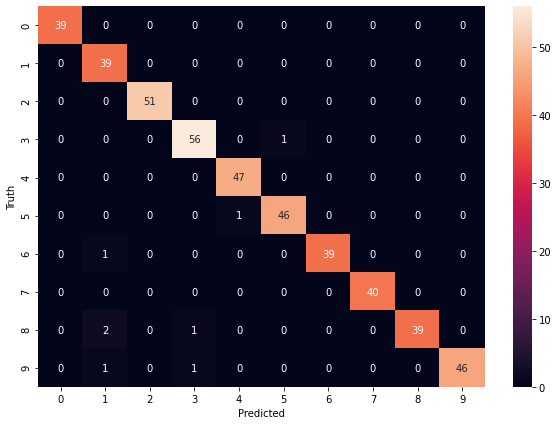

In [39]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')